# Part D

In [1]:
#General imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import random
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz 
%matplotlib inline
HB = pd.read_csv("bookingHotelsClean2.csv")
EX = pd.read_csv("expidiaHotelsClean2.csv")


In [2]:
#Merge df

marged = HB.merge(EX, on=['Name','TimeToTravel','LengthOfStay','SnapShotDate','Start_Date', 'End_Date'],suffixes=('_right','_left'))

In [3]:
#clean

marged = marged[['index_right', 'Name',  'Rate_right', 'Grade_right',
       'Price_right', 'Review_right', 'TypeRoom', 'TypeBed', 'SnapShotDate',
       'LengthOfStay', 'TimeToTravel', 'Prepayment', 'Location_Battery Park',
       'index_left', 'Rate_left', 'Grade_left', 'Price_left', 'Review_left',
       'Distance','Day_of_week_snapshot_left', 'Number_of_weekend_days_left',
       'Day_of_month_check_in_left', 'Day_of_month_check_out_left','TypeBed','Cancellation']]

In [4]:
#Save

marged.to_csv('Marged',index=False)

In [5]:
#Rename

marged.rename(columns={'Price_right':'Booking_Price'}, inplace=True)
marged.rename(columns={'Price_left':'EXP_Price'}, inplace=True)
marged.rename(columns={'Rate_right':'Booking_Rate'}, inplace=True)
marged.rename(columns={'Rate_left':'EXP_Rate'}, inplace=True)
marged.rename(columns={'Review_right':'Booking_Review'}, inplace=True)
marged.rename(columns={'Review_left':'EXP_Review'}, inplace=True)
marged.rename(columns={'Grade_right':'Booking_Grade'}, inplace=True)
marged.rename(columns={'Grade_left':'EXP_Grade'}, inplace=True)
marged.rename(columns={'Start_Date_right':'Booking_Start_date'}, inplace=True)
marged.rename(columns={'Start_Date_left':'EXP_Start_date'}, inplace=True)
marged.rename(columns={'End_Date_right':'booking_Date_left'}, inplace=True)
marged.rename(columns={'End_Date_left':'EXP_Date_left'}, inplace=True)

In [6]:
#calculate diffrence column between the prices
marged['difference'] = marged["Booking_Price"]-marged["EXP_Price"]

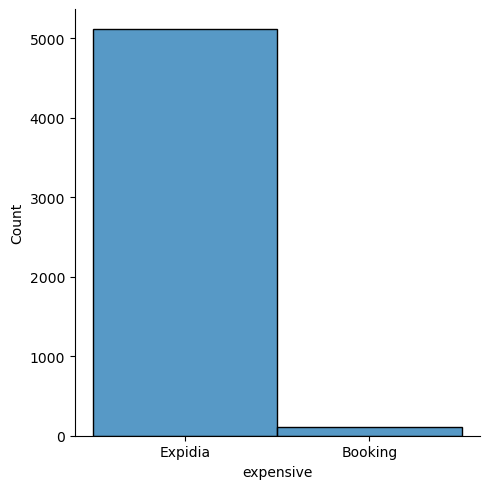

In [7]:
#who is more expensive?

marged.loc[:,'expensive'] = np.where(marged['difference']>0, 'Booking','Expidia')
sns.displot(marged.expensive)

In [8]:
marged['Rating_Diff'] = (marged['EXP_Rate']-marged['Booking_Rate'])
marged['Grade_Diff'] = (marged['EXP_Grade']-marged['Booking_Grade'])
marged['Review_Diff'] = (marged['EXP_Review']-marged['Booking_Review'])
marged['Price_Diff'] = (marged['EXP_Price']-marged['Booking_Price'])

In [9]:
#Prepare the data


x = marged[['Grade_Diff','Review_Diff','TimeToTravel','LengthOfStay','TypeRoom', 'Prepayment','Distance','Day_of_week_snapshot_left', 'Number_of_weekend_days_left','Day_of_month_check_in_left', 'Day_of_month_check_out_left','TypeBed','Cancellation']]
y = marged['Price_Diff']




#test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

RMSE: 304.658
MSE:  92816.597
MAE:  212.125
R2:   0.553


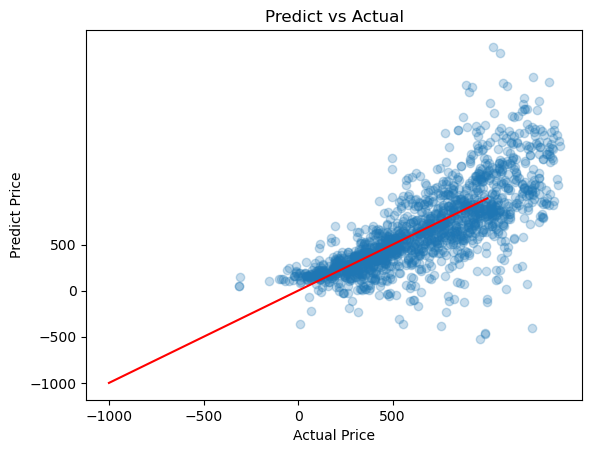

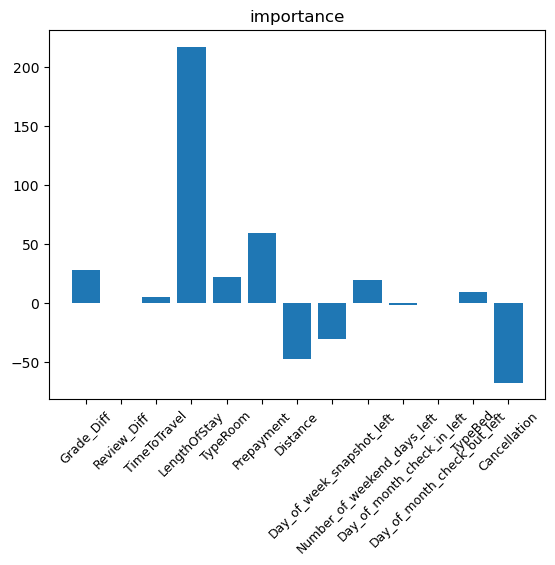

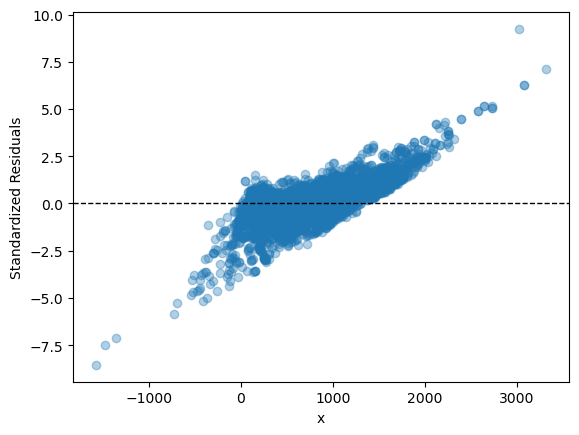

In [10]:
#Function to find RMSE MSE MAE R2

def reg_metrics(y_test, y_pred, x_train):
    
    #imports
    from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


    #calculate
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    
    #print
    print("RMSE: " + str(round(RMSE,3)))
    print("MSE:  " + str(round(MSE,3)))
    print("MAE:  " +  str(round(MAE,3)))
    print("R2:   " + str(round(R2,3)))

#LinearRegression



# Create model
from sklearn import linear_model
reg = linear_model.LinearRegression()
from matplotlib import pyplot


# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred = reg.predict(x_test)


#Calculate
reg_metrics(y_test, y_pred, x_train)


#visualisation
plt.title('Predict vs Actual')
plt.xlabel("Actual Price")
plt.ylabel("Predict Price")
X = np.linspace(-1000,1000,100)
Y = 1*X+0
plt.plot(X, Y, '-r')
plt.scatter(y_pred,y_test,alpha=0.25)
plt.xticks(np.arange(-1000,1000,step=500))
plt.yticks(np.arange(-1000,1000,step=500))
plt.show()




# get importance
plt.title('importance')
importance = reg.coef_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()





import statsmodels.api as sm

#add constant to predictor variables
x_r = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_r).fit() 


#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal



plt.scatter(marged['Price_Diff'], standardized_residuals,alpha=0.35)
plt.xlabel('x')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()



RMSE: 267.815
MSE:  71725.016
MAE:  183.808
R2:   0.654


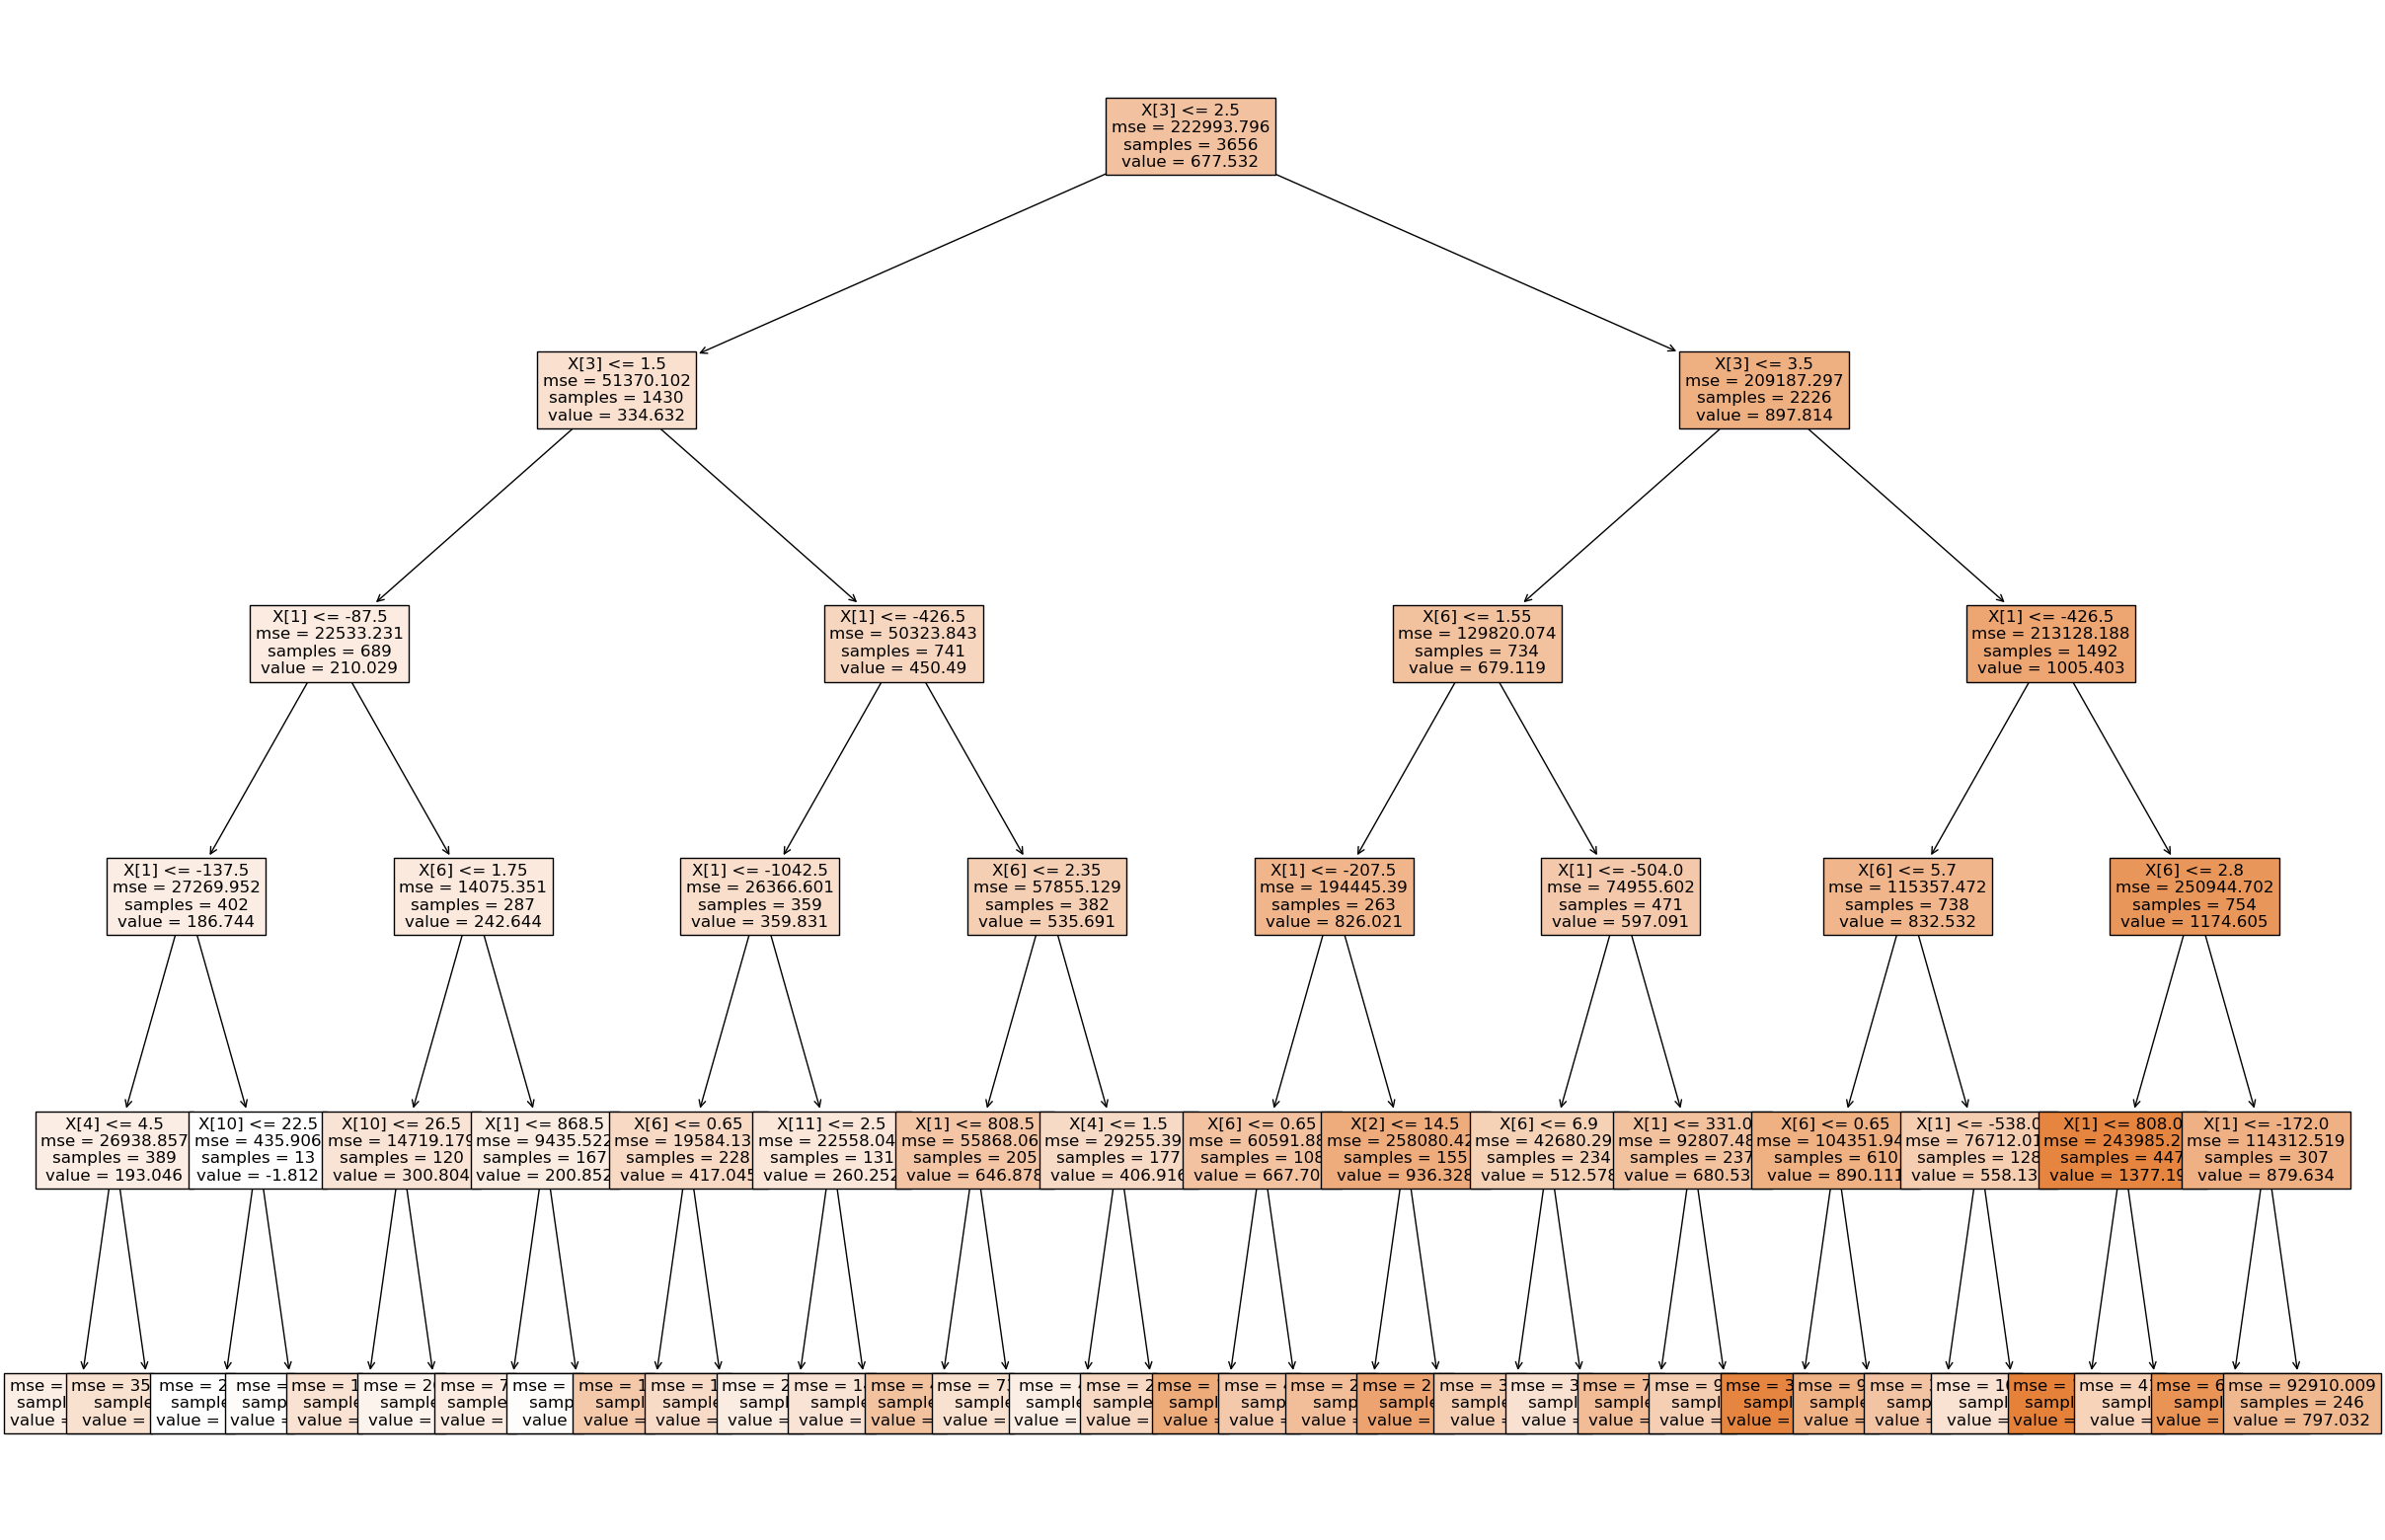

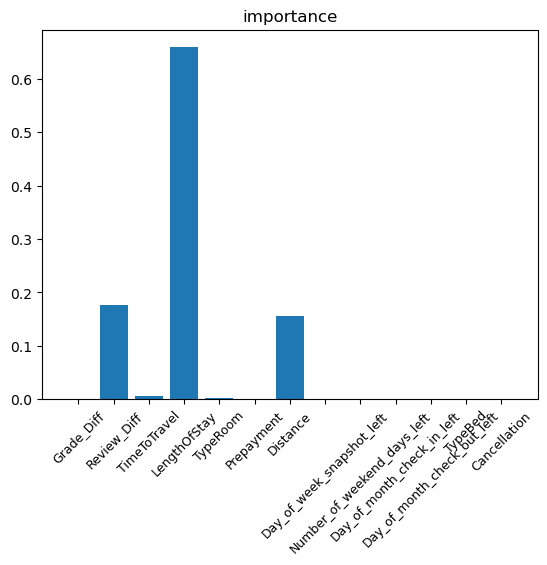

In [11]:
#DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# the best Tree regressor
 
reg = tree.DecisionTreeRegressor(criterion='mse', max_depth=5 , min_samples_leaf=3, random_state=101)

# Train the model
        
reg.fit(x_train, y_train)
    
# Make predictions
y_pred = reg.predict(x_test)

#Calculate
reg_metrics(y_test, y_pred, x_train)


#Visualisation
# Plot the decision tree
fig, ax = plt.subplots(figsize=(30, 20))
tree.plot_tree(reg, filled=True, fontsize=12, ax=ax)
plt.show()


# get importance
plt.title('importance')
importance = reg.feature_importances_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()

In [12]:
#GaussianProcessRegressor

data = marged[['Price_Diff','Grade_Diff','Review_Diff','TimeToTravel','LengthOfStay','TypeRoom', 'Prepayment','Distance','Day_of_week_snapshot_left', 'Number_of_weekend_days_left','Day_of_month_check_in_left', 'Day_of_month_check_out_left','Cancellation']]



#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
normalized = pd.DataFrame(scaled, columns = data.columns)
sampled = normalized.sample(frac=0.06)

x = sampled[['Grade_Diff','Review_Diff','TimeToTravel','LengthOfStay','TypeRoom', 'Prepayment','Distance','Day_of_week_snapshot_left', 'Number_of_weekend_days_left','Day_of_month_check_in_left', 'Day_of_month_check_out_left','Cancellation']]
y = sampled['Price_Diff']




x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)



# Create model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
kernel = ConstantKernel(1.0) + ConstantKernel(1.0) * RBF(10)  + WhiteKernel(5)
reg = GaussianProcessRegressor(kernel=kernel)

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred = reg.predict(x_test)

#Calculate
reg_metrics(y_test, y_pred, x_train)

RMSE: 0.055
MSE:  0.003
MAE:  0.038
R2:   0.64


# User Interface


## An interface that allows the user to select the properties for the hotel he is looking for

In [13]:
#calculate AVG of Grade,Rating,Review and price from both Websites

marged['Rating_AVG'] = (marged['EXP_Rate']+marged['Booking_Rate'])/2
marged['Grade_AVG'] = (marged['EXP_Grade']+marged['Booking_Grade'])/2
marged['Review_AVG'] = (marged['EXP_Review']+marged['Booking_Review'])/2
marged['Price_AVG'] = (marged['EXP_Price']+marged['Booking_Price'])/2
marged


,index_right,Name,Booking_Rate,Booking_Grade,Booking_Price,Booking_Review,TypeRoom,TypeBed,SnapShotDate,LengthOfStay,...,difference,expensive,Rating_Diff,Grade_Diff,Review_Diff,Price_Diff,Rating_AVG,Grade_AVG,Review_AVG,Price_AVG
0,0,Walker Hotel Tribeca,8.1,8,767.0,1277,3,2,2023-03-22,1,...,-121.18,Expidia,0.5,1,-898,121.18,8.35,8.5,828.0,827.590
1,13,The Jane Hotel,7.4,7,513.0,1900,3,2,2023-03-22,1,...,-13.62,Expidia,1.0,1,-900,13.62,7.90,7.5,1450.0,519.810
2,14,Pod Times Square,8.1,8,510.0,12925,3,2,2023-03-22,1,...,-169.89,Expidia,0.5,1,-10126,169.89,8.35,8.5,7862.0,594.945
3,16,Hotel Mulberry,8.4,8,656.0,366,5,3,2023-03-22,1,...,-23.89,Expidia,0.6,1,634,23.89,8.70,8.5,683.0,667.945
4,17,Ramada by Wyndham New York Times Square West,6.9,6,496.0,2611,5,3,2023-03-22,1,...,-148.52,Expidia,0.7,1,-1613,148.52,7.25,6.5,1804.5,570.260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,13947,Arlo Midtown,8.7,9,5960.0,3066,4,3,2023-03-26,5,...,-1762.45,Expidia,0.5,0,174,1762.45,8.95,9.0,3153.0,6841.225
5219,13973,Hilton Club The Central at 5th New York,8.6,9,5483.0,62,4,3,2023-03-26,5,...,-973.99,Expidia,0.6,0,54,973.99,8.90,9.0,89.0,5969.995
5220,13980,Sheraton New York Times Square Hotel,7.4,7,5617.0,979,3,2,2023-03-26,5,...,-1547.39,Expidia,0.6,1,256,1547.39,7.70,7.5,1107.0,6390.695
5221,13996,HGU New York,7.4,7,4651.0,1535,5,2,2023-03-26,5,...,-1464.08,Expidia,0.6,1,-535,1464.08,7.70,7.5,1267.5,5383.040


In [14]:
for n in marged['Name']:
   marged['Sugg']= marged['expensive']

In [15]:
#hotel suggestion by expennsive hotel
marged['Sugg'] = np.where(marged['Sugg']=="Expidia", "Booking", "Expidia")

In [16]:
for n in marged['Name']:
   marged['Price_Sug_Website']= marged['Sugg']
   marged['Rating_Sug_Website']= marged['Sugg']
   marged['Grade_Sug_Website']= marged['Sugg']

In [17]:
#hotel suggestion by expennsive hotel
marged['Price_Sug_Website'] = np.where(marged['Price_Sug_Website']=="Booking", marged.Booking_Price, marged.EXP_Price)
marged['Ratating_Sug_Website'] = np.where(marged['Rating_Sug_Website']=="Booking", marged.Booking_Rate, marged.EXP_Rate)
marged['Grade_Sug_Website'] = np.where(marged['Grade_Sug_Website']=="Booking", marged.Booking_Grade, marged.EXP_Grade)

In [18]:
marged=marged.sort_values('Rating_AVG',ascending=False)
marged=marged.sort_values('Price_AVG',ascending=False)
marged.head()

,index_right,Name,Booking_Rate,Booking_Grade,Booking_Price,Booking_Review,TypeRoom,TypeBed,SnapShotDate,LengthOfStay,...,Price_Diff,Rating_AVG,Grade_AVG,Review_AVG,Price_AVG,Sugg,Price_Sug_Website,Rating_Sug_Website,Grade_Sug_Website,Ratating_Sug_Website
4240,7954,Omni Berkshire Place,8.7,9,8156.0,551,5,3,2023-03-26,5,...,1869.43,8.85,9.0,777.5,9090.715,Booking,8156.0,Booking,9,8.7
3334,3482,Hard Rock Hotel New York,8.8,9,8005.0,1295,5,3,2023-03-26,5,...,1643.15,9.10,9.5,1035.5,8826.575,Booking,8005.0,Booking,9,8.8
474,2948,The Hotel Chelsea,9.3,9,8147.0,411,3,3,2023-03-22,5,...,1222.12,9.45,9.5,285.5,8758.060,Booking,8147.0,Booking,9,9.3
3842,5891,"The Langham, New York, Fifth Avenue",9.1,9,8032.0,254,5,3,2023-03-26,4,...,1415.72,9.25,9.5,628.0,8739.860,Booking,8032.0,Booking,9,9.1
3726,5373,"The Langham, New York, Fifth Avenue",9.1,9,8032.0,254,5,3,2023-03-26,4,...,1415.72,9.25,9.5,628.0,8739.860,Booking,8032.0,Booking,9,9.1


## Request to enter values from the user

In [19]:
L_nights = input('Enter num of nights please: ')

Enter num of nights please: 4


In [20]:
L_r = input('Enter type of room please: ')

Enter type of room please: 2


In [21]:
L_MP =input('Enter Max price you want to pay ')

Enter Max price you want to pay 4000


In [22]:
L_D = input('Enter Max Distance you want to stay at ')

Enter Max Distance you want to stay at 5


In [23]:
L_Ra = input('Enter Min Rate of hotel you want to stay at ')

Enter Min Rate of hotel you want to stay at 8


In [24]:
res = marged[(marged.LengthOfStay == int(L_nights)) & (marged.TypeRoom == int(L_r)) &  (marged.Distance < int(L_D)) & (marged.Rating_AVG > int(L_Ra)) ]

In [25]:
res.columns

Index(['index_right', 'Name', 'Booking_Rate', 'Booking_Grade', 'Booking_Price',
       'Booking_Review', 'TypeRoom', 'TypeBed', 'SnapShotDate', 'LengthOfStay',
       'TimeToTravel', 'Prepayment', 'Location_Battery Park', 'index_left',
       'EXP_Rate', 'EXP_Grade', 'EXP_Price', 'EXP_Review', 'Distance',
       'Day_of_week_snapshot_left', 'Number_of_weekend_days_left',
       'Day_of_month_check_in_left', 'Day_of_month_check_out_left', 'TypeBed',
       'Cancellation', 'difference', 'expensive', 'Rating_Diff', 'Grade_Diff',
       'Review_Diff', 'Price_Diff', 'Rating_AVG', 'Grade_AVG', 'Review_AVG',
       'Price_AVG', 'Sugg', 'Price_Sug_Website', 'Rating_Sug_Website',
       'Grade_Sug_Website', 'Ratating_Sug_Website'],
      dtype='object')

In [26]:
print("Good Choice!!")
print("Let us remind you what you chose for your next vacation:")
print("night to stay = ",L_nights )
print("Room Type = ",L_r )
print("Max Price = ",L_MP )
print("Max Distance from the center = ",L_D)
print("Max Horel Rate = ",L_Ra)
print("List of optional hotels")
p_res=res[['Name','TypeRoom','TypeBed','LengthOfStay','TimeToTravel','Distance','expensive','Rating_AVG','Grade_AVG','Review_AVG','Sugg','Price_Sug_Website','Grade_Sug_Website','Rating_Sug_Website']]
p_res

Good Choice!!
Let us remind you what you chose for your next vacation:
night to stay =  4
Room Type =  2
Max Price =  4000
Max Distance from the center =  5
Max Horel Rate =  8
List of optional hotels


,Name,TypeRoom,TypeBed,TypeBed,LengthOfStay,TimeToTravel,Distance,expensive,Rating_AVG,Grade_AVG,Review_AVG,Sugg,Price_Sug_Website,Grade_Sug_Website,Rating_Sug_Website
3507,Park Terrace Hotel,2,2,2,4,9.0,1.7,Expidia,8.95,9.0,1711.0,Booking,6404.00,9,Booking
3215,Park Terrace Hotel,2,2,2,4,6.0,1.7,Expidia,8.95,9.0,1711.0,Booking,5750.00,9,Booking
4781,Moxy NYC Chelsea,2,2,2,4,23.0,2.5,Expidia,8.45,8.5,2368.0,Booking,5484.00,8,Booking
5021,Moxy NYC Chelsea,2,2,2,4,26.0,2.5,Expidia,8.45,8.5,2368.0,Booking,4654.00,8,Booking
1025,CIVILIAN Hotel,2,2,2,4,13.0,0.9,Expidia,8.85,8.5,1023.5,Booking,4862.00,8,Booking
1116,CIVILIAN Hotel,2,2,2,4,14.0,0.9,Booking,8.85,8.5,1023.5,Expidia,4771.02,9,Expidia
4141,CIVILIAN Hotel,2,2,2,4,15.0,0.9,Expidia,8.85,8.5,1041.0,Booking,4226.00,8,Booking
4714,CIVILIAN Hotel,2,2,2,4,22.0,0.9,Expidia,8.85,8.5,1041.0,Booking,4118.00,8,Booking
1216,CIVILIAN Hotel,2,2,2,4,15.0,0.9,Booking,8.85,8.5,1023.5,Expidia,4409.46,9,Expidia
848,CIVILIAN Hotel,2,2,2,4,11.0,0.9,Expidia,8.85,8.5,1023.5,Booking,3982.00,8,Booking


In [27]:
print("To make it easier, you can filter by hotel name")

To make it easier, you can filter by hotel name


In [28]:
b_name=input('enter name of hotel from the list please:')

enter name of hotel from the list please:CIVILIAN Hotel


In [29]:
#filter by the user choice
p_res[p_res['Name']==b_name]

,Name,TypeRoom,TypeBed,TypeBed,LengthOfStay,TimeToTravel,Distance,expensive,Rating_AVG,Grade_AVG,Review_AVG,Sugg,Price_Sug_Website,Grade_Sug_Website,Rating_Sug_Website
1025,CIVILIAN Hotel,2,2,2,4,13.0,0.9,Expidia,8.85,8.5,1023.5,Booking,4862.00,8,Booking
1116,CIVILIAN Hotel,2,2,2,4,14.0,0.9,Booking,8.85,8.5,1023.5,Expidia,4771.02,9,Expidia
4141,CIVILIAN Hotel,2,2,2,4,15.0,0.9,Expidia,8.85,8.5,1041.0,Booking,4226.00,8,Booking
4714,CIVILIAN Hotel,2,2,2,4,22.0,0.9,Expidia,8.85,8.5,1041.0,Booking,4118.00,8,Booking
1216,CIVILIAN Hotel,2,2,2,4,15.0,0.9,Booking,8.85,8.5,1023.5,Expidia,4409.46,9,Expidia
848,CIVILIAN Hotel,2,2,2,4,11.0,0.9,Expidia,8.85,8.5,1023.5,Booking,3982.00,8,Booking
4039,CIVILIAN Hotel,2,2,2,4,14.0,0.9,Expidia,8.85,8.5,1041.0,Booking,4011.00,8,Booking
935,CIVILIAN Hotel,2,2,2,4,12.0,0.9,Booking,8.85,8.5,1023.5,Expidia,4189.38,9,Expidia
5203,CIVILIAN Hotel,2,2,2,4,28.0,0.9,Expidia,8.85,8.5,1041.0,Booking,3975.00,8,Booking
4378,CIVILIAN Hotel,2,2,2,4,18.0,0.9,Expidia,8.85,8.5,1041.0,Booking,3867.00,8,Booking


# Interface End

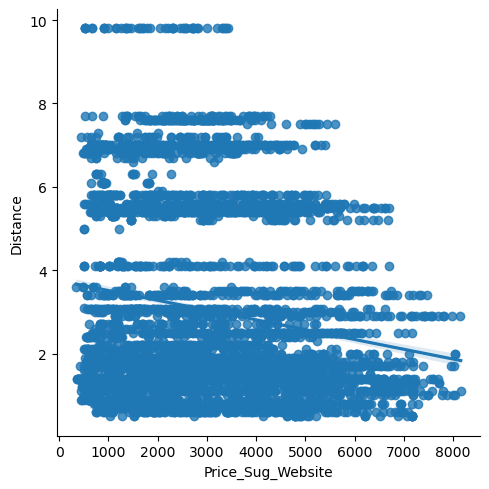

In [50]:
sns.lmplot(data=marged,x='Price_Sug_Website',y='Distance')
plt.show()

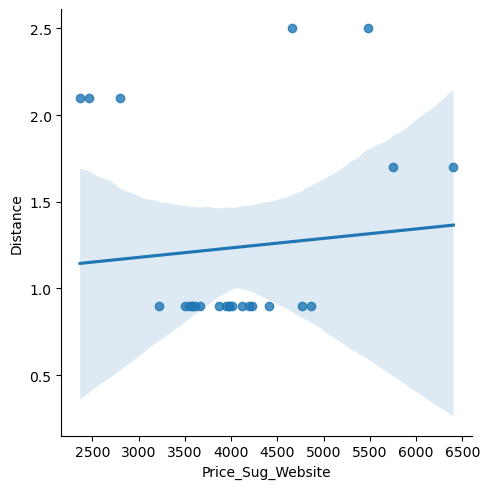

In [51]:
sns.lmplot(data=res,x='Price_Sug_Website',y='Distance')
plt.show()

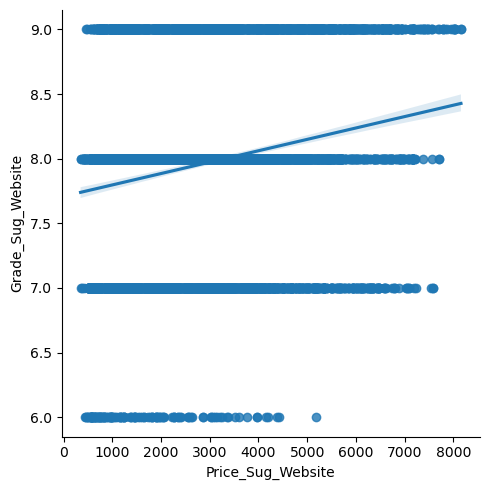

In [52]:
sns.lmplot(data=marged,x='Price_Sug_Website',y='Grade_Sug_Website')
plt.show()

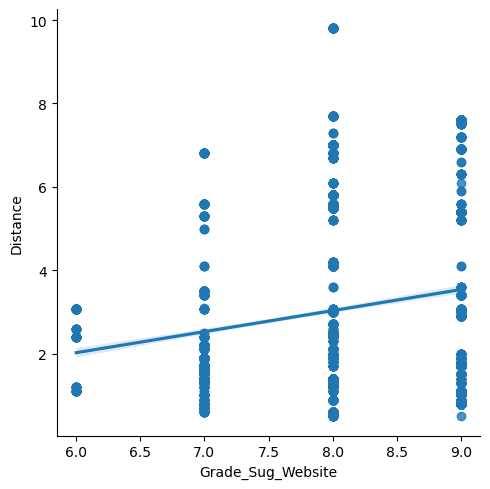

In [53]:
sns.lmplot(data=marged,x='Grade_Sug_Website',y='Distance')
plt.show()

In [54]:
#The hotels that are closer to the center are more expensive and have Higher Grades

In [55]:
p_res.sort_values('Price_Sug_Website', ascending = True)

,Name,TypeRoom,TypeBed,TypeBed,LengthOfStay,TimeToTravel,Distance,expensive,Rating_AVG,Grade_AVG,Review_AVG,Sugg,Price_Sug_Website,Grade_Sug_Website,Rating_Sug_Website
2865,Pod 39,2,1,1,4,3.0,2.1,Expidia,8.25,8.0,3537.0,Booking,2367.00,8,Booking
2990,Pod 39,2,1,1,4,4.0,2.1,Expidia,8.25,8.0,3537.0,Booking,2460.00,8,Booking
544,Pod 39,2,1,1,4,7.0,2.1,Expidia,8.25,8.0,3521.5,Booking,2794.00,8,Booking
461,The Belvedere Hotel,2,2,2,4,6.0,0.9,Expidia,8.30,8.5,2990.0,Booking,3221.00,8,Booking
4459,CIVILIAN Hotel,2,2,2,4,19.0,0.9,Expidia,8.85,8.5,1041.0,Booking,3507.00,8,Booking
4544,CIVILIAN Hotel,2,2,2,4,20.0,0.9,Expidia,8.85,8.5,1041.0,Booking,3543.00,8,Booking
536,CIVILIAN Hotel,2,2,2,4,7.0,0.9,Booking,8.85,8.5,1023.5,Expidia,3576.30,9,Expidia
4626,CIVILIAN Hotel,2,2,2,4,21.0,0.9,Expidia,8.85,8.5,1041.0,Booking,3579.00,8,Booking
614,CIVILIAN Hotel,2,2,2,4,8.0,0.9,Expidia,8.85,8.5,1023.5,Booking,3615.00,8,Booking
72,CIVILIAN Hotel,2,2,2,4,1.0,0.9,Booking,8.85,8.5,1023.5,Expidia,3666.69,9,Expidia


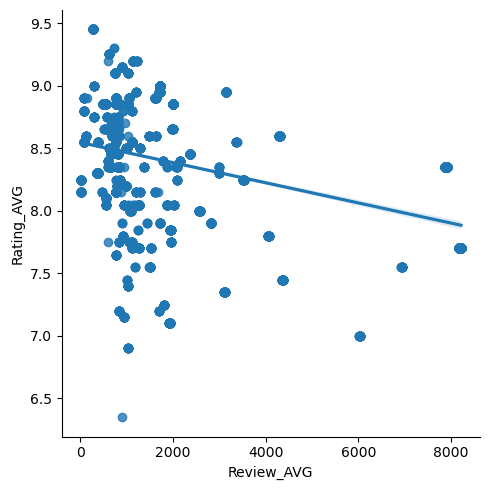

In [58]:
sns.lmplot(x="Review_AVG", y='Rating_AVG', data=marged )

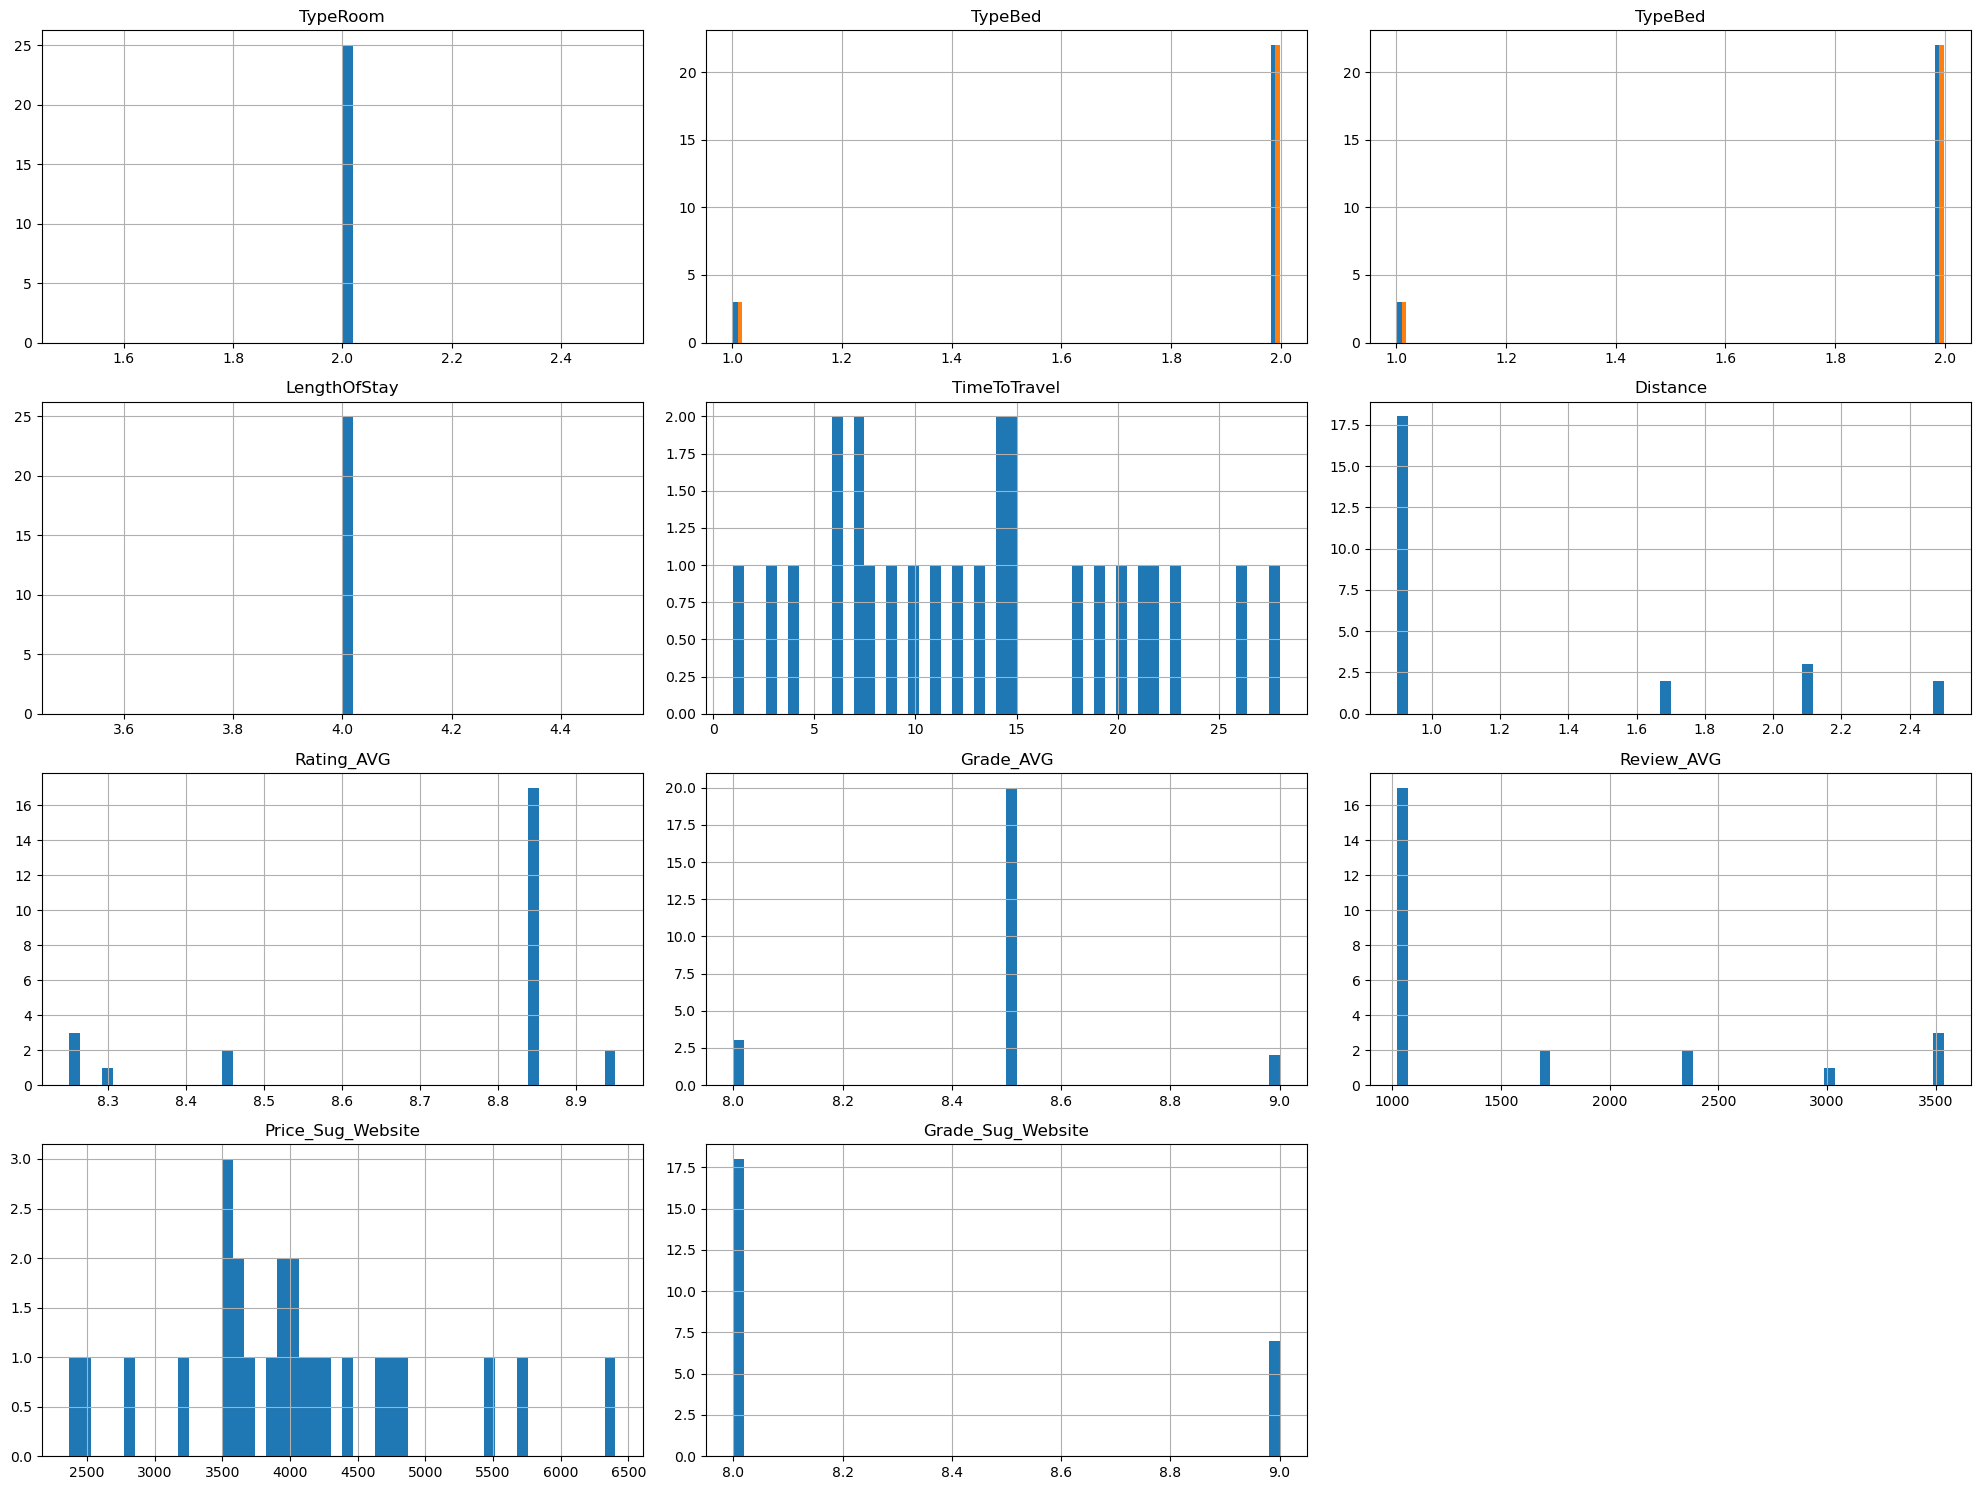

In [59]:
p_res.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

<AxesSubplot:ylabel='Grade_Sug_Website'>

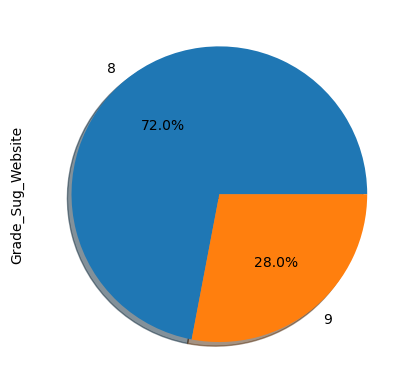

In [60]:
from sklearn.preprocessing import StandardScaler
p_res['Grade_Sug_Website'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)


<AxesSubplot:ylabel='Sugg'>

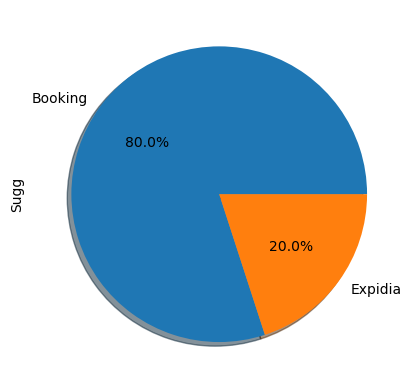

In [61]:
p_res['Sugg'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

In [49]:
#conclutions:
#expidia more expensive then Booking
#Booking has more information that affects the price
#more reviews leads hotls to low rating
#half of hotel amount on 8.2-8.9 Rating
#Booking is the suggest option in 80% of new your hotels